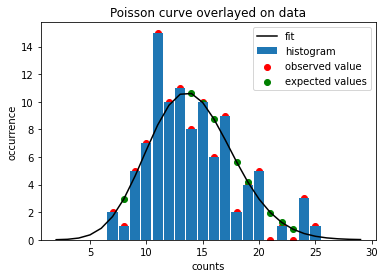

Mean of distribution is : 14.07
Chi square of the fit is : 31.881047646120887
No of degrees of freedom is : 18
Your (chi_square)/DoF is = 1.7711693136733826 , which is greater than 1 => Poisson fit doesn't overlap well with the distribution of your data (A good fit woulld have chi_square/dof <=1) 


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats
import pandas as pd

from scipy.special import factorial
# (function needed to compute factorials for an array)  ## Not anymore



def P(N,Nbar):
    lnprob=N*np.log(Nbar) - Nbar - scipy.special.gammaln(N+1)
    return np.exp(lnprob)




#Read raw trails from excel sheet (trail number vs observed counts)
filelow=pd.read_csv(r'./Radon-lowcount(77) - Sheet1 (3).csv')
data=filelow["count"]
#Check if data is loaded correctly
#print(data)



min_count = min(data)
max_count = max(data)
#print(min_count, max_count)


#Create approopriate boundaries
bin_boundaries = []
for i in range (0,(max_count-min_count+1)+1):
    bin_boundaries.append(i+(min(data)-0.5))

## Plot histogram of the distribution
hist_data = plt.hist(data,bin_boundaries,label='histogram',rwidth=0.90)




# Extract counts and occurrence from the histogram
counts1=[]
for i in range(min_count,max_count+1):
    counts1.append(i)
counts = np.array(counts1)
occurrence = hist_data[0]



# Mean calculation
 
m=0
for i in range(0, len(counts)):
    m= m+ counts[i]*occurrence[i]
    
#Mean of the distribution
mean= m/sum(occurrence)
Mean_counts= mean 
#print("Mean of distribution is :" , Mean_counts)



#Scatter plot of the distribution, i.e, heights of bars on histogram (**should be avilable in the input file**) vs counts
plt.scatter(counts, occurrence,label='observed value',color='red') 



# Creating a x_values for plotting a smooth fit
l=list(range(max(min(counts)-5,0),max(counts)+5)) #(N can not be less than zero for P(N))
l1=np.array(l,dtype='double') # Changing data type to accommodate high exponentials
#print("list of x values for plotting are= ",l1)

  


#Genrate data poitns to make smooth curve
y_for_fit = P(l1,np.float(mean))
plt.plot(l1,y_for_fit*np.sum(occurrence),'k',label='fit')
#----------------------------------------------------


#Scatter plot of expected points on the curve
expexted_y_values = P(counts,np.float(mean))*np.sum(occurrence)
plt.scatter(counts,expexted_y_values,color='green',label='expected values')
#-------------------------------------------------------


## Chi_square calculation
chi_square=0
for i in range(0,len(counts)):
    chi_square = chi_square + ((occurrence[i]-expexted_y_values[i])**2)/(expexted_y_values[i])
#-------------------------------------------------------
        

# Plot graph        
plt.xlabel("counts")
plt.ylabel("occurrence")
plt.title("Poisson curve overlayed on data")
plt.legend()
plt.show()    
    
    
# Print_results
print("Mean of distribution is :" , Mean_counts)
print("Chi square of the fit is :",chi_square)
Dof=len(counts)-1 #Degrees of freedom
print("No of degrees of freedom is :",Dof)


if (chi_square/Dof>1):
    print("Your (chi_square)/DoF is =",chi_square/Dof,", which is greater than 1 => Poisson fit doesn't overlap well with the distribution of your data (A good fit woulld have chi_square/dof <=1) ")
if (chi_square/Dof<=1):
    print("Your (chi_square)/DoF is  =",chi_square/Dof,", which is less than 1 => Poisson fit overlaps well with the distribution of your data (A good fit woulld have chi_square/dof <=1) ")

    
